# <font color='orange'>Développez une preuve de concept.</font>

## <font color='navy'>Sommaire

**Partie 1 : Baseline.**
- <a href="#C1">Projet de Classification d'Images CIFAR-10 avec Transfer Learning.</a>
- <a href="#C2">Exploration des données.</a>
- <a href="#C3">Prétraitement des données.</a>
- <a href="#C4">Modèle MLP.</a>
- <a href="#C5">Réseau de neurone convolutif.</a>
- <a href="#C6">Autre struture de CNN.</a>
- <a href="#C7">Modèle en utilisant le transfert learning VGG16.</a>

**Partie 2 : Preuve de concept.**
- <a href="#C8">Regnety_16.</a>    
- <a href="#C9">YOLOv11-cls.</a>
- <a href="#C10">Analyse de la feature importance globale et locale.</a>
- <a href="#C11">Comparaison des differents modèles.</a>

# <font color='navy'>PARTIE 1 - Baseline.</font>

## <a name="C1"><font color='orange'>Projet de Classification d'Images CIFAR-10 avec Transfer Learning.</font></a>

*Ce projet se concentre sur la classification d'images en utilisant la base de données CIFAR-10. L'objectif est de développer des modèles de machine learning capables de prédire à quelles classes appartiennent les images de cette base de données. De plus, la puissante technique du Transfer Learning sera explorée pour améliorer les performances des modèles.*

**Description de la Base de Données.**<br>
La base de données CIFAR-10 contient 60 000 images couleur (32x32 pixels) réparties en 10 classes, avec 6 000 images par classe. Les classes comprennent des objets courants tels que des avions, des automobiles, des oiseaux, des chats, des cerfs, des chiens, des grenouilles, des chevaux, des bateaux et des camions.

**Objectif.**<br>
L'objectif de ce projet est de développer deux modèles de machine learning pour effectuer la classification d'images sur la base de données CIFAR-10. Deux types de modèles seront utilisés : un Perceptron Multicouche (MLP) et un réseau de neurones convolutifs (CNN). De plus, le Transfer Learning sera exploré pour évaluer son impact sur les performances des modèles.

**Étapes du Projet**<br>

1. **Exploration des Données** : L'exploration de la base de données CIFAR-10 permettra une meilleure compréhension des données.

2. **Prétraitement des Données** : Les données seront prétraitées, y compris la normalisation des pixels des images et d'autres étapes de prétraitement si nécessaire.

3. **Modèle MLP** : Un modèle Perceptron Multicouche (MLP) sera construit pour la classification d'images.

4. **Modèle CNN** : Un réseau de neurones convolutifs (CNN) sera construit pour la classification d'images.

5. **Transfer Learning** : Le Transfer Learning sera exploré en utilisant un modèle pré-entraîné pour la classification des images CIFAR-10, avec ajustements spécifiques à la tâche.

6. **Évaluation des Modèles** : Les performances de tous les modèles seront évaluées en utilisant les données de test, avec une comparaison des résultats.


Ce projet permet de se familiariser avec la classification d'images, de comparer les performances des modèles traditionnels (MLP et CNN) et d'explorer comment le Transfer Learning peut améliorer la classification d'images.

## <a name="C2"><font color='orange'>Exploration des données.</font></a>

In [10]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 #Base de données
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [11]:
# Charger les données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [12]:
# Classes CIFAR-10
cifar10_classes = ["Avion", "Automobile", "Oiseau", "Chat", "Cerf",
                   "Chien", "Grenouille", "Cheval", "Bateau", "Camion"]

# Afficher la forme des ensembles d'entraînement et de test
print("Forme de l'ensemble d'entraînement (images) :", x_train.shape)
print("Forme de l'ensemble d'entraînement (étiquettes) :", y_train.shape)
print("Forme de l'ensemble de test (images) :", x_test.shape)
print("Forme de l'ensemble de test (étiquettes) :", y_test.shape)

Forme de l'ensemble d'entraînement (images) : (50000, 32, 32, 3)
Forme de l'ensemble d'entraînement (étiquettes) : (50000, 1)
Forme de l'ensemble de test (images) : (10000, 32, 32, 3)
Forme de l'ensemble de test (étiquettes) : (10000, 1)


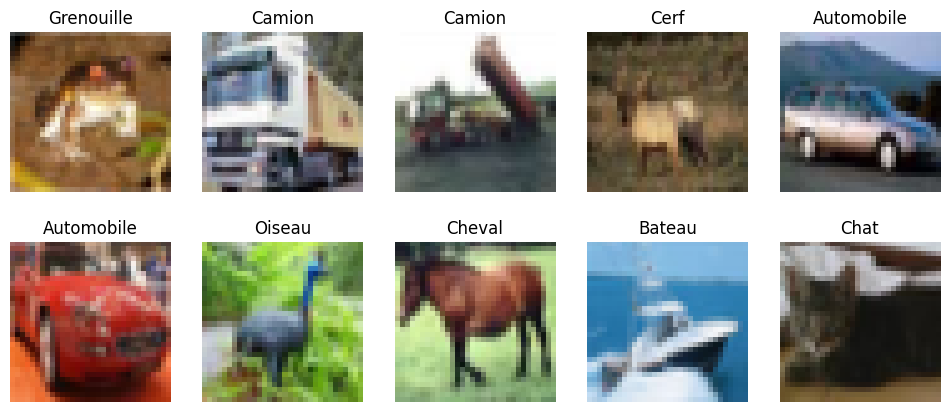

In [13]:
# Afficher quelques exemples d'images et leurs étiquettes
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(cifar10_classes[y_train[i][0]])
    plt.axis('off')
plt.show()

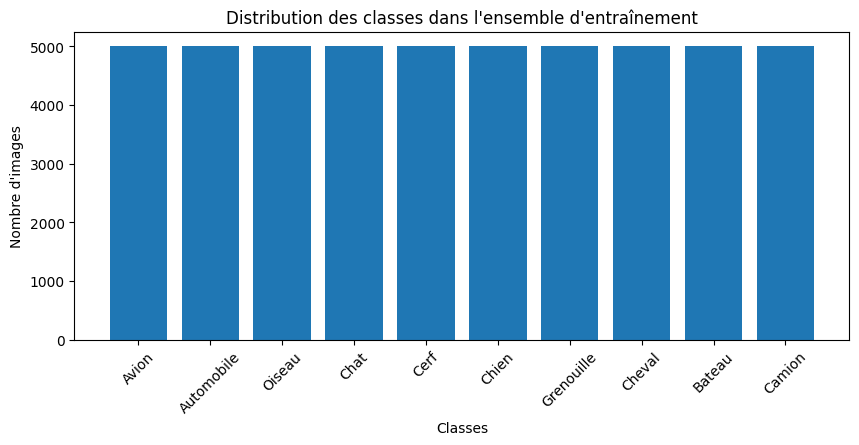

In [14]:
# Afficher la distribution des classes dans l'ensemble d'entraînement
class_distribution = [0] * 10
for label in y_train:
    class_distribution[label[0]] += 1
    
plt.figure(figsize=(10, 4))
plt.bar(cifar10_classes, class_distribution)
plt.title("Distribution des classes dans l'ensemble d'entraînement")
plt.xlabel("Classes")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)
plt.show()

## <a name="C3"><font color='orange'>Prétraitement des données.</font></a>

In [16]:
# Normaliser les pixels des images en mettant à l'échelle entre 0 et 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [17]:
# Transformer les étiquettes en vecteurs one-hot (encodage catégoriel)
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [18]:
# Afficher les dimensions après le prétraitement
print("Forme de l'ensemble d'entraînement (images) :", x_train.shape)
print("Forme de l'ensemble de test (images) :", x_test.shape)
print("Forme de l'ensemble d'entraînement (étiquettes) :", y_train.shape)
print("Forme de l'ensemble de test (étiquettes) :", y_test.shape)

Forme de l'ensemble d'entraînement (images) : (50000, 32, 32, 3)
Forme de l'ensemble de test (images) : (10000, 32, 32, 3)
Forme de l'ensemble d'entraînement (étiquettes) : (50000, 10)
Forme de l'ensemble de test (étiquettes) : (10000, 10)


In [ ]:
# Initialisation.
results_summary = []

## <a name="C4"><font color='orange'>Modèle MLP.</font></a>

**Construction du modèle**

In [21]:
# Importer les bibliothèques nécessaires
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Définir le modèle MLP pour la classification d'images
model_mlp = keras.Sequential([
    # Aplatir les images 32x32 en un vecteur 1D 
    layers.Flatten(input_shape=(32, 32, 3)),#3: RVB
    # Ajouter une couche cachée de 128 neurones avec une fonction d'activation ReLU
    layers.Dense(128, activation='relu'),
    # Ajouter la couche de sortie avec 10 neurones (classes CIFAR-10) et une fonction d'activation softmax
    layers.Dense(10, activation='softmax')
])

C:\Users\jouvi\anaconda3\envs\env_p7\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_mlp.compile(optimizer='adam', # Utilisation de l'optimiseur Adam
                  loss='categorical_crossentropy', # Fonction de perte pour la classification multiclasse
                  metrics=['accuracy']) # Métrique de précision

In [23]:
# Afficher un résumé du modèle pour obtenir des informations sur les couches et les paramètres
model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Entraîner le modèle MLP sur les données d'entraînement
epochs = 100  # Nombre d'époques
batch_size = 32  # Taille du batch

# Utilisation de la validation split (20% des données pour la validation)
historique = model_mlp.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_mlp.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

# Enregistrement des résultats.
results_summary.append({
    "modèle": "MLP",
    "accuracy": test_accuracy,
    "loss": test_loss
})

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2668 - loss: 2.0726 - val_accuracy: 0.3334 - val_loss: 1.8527
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3628 - loss: 1.7868 - val_accuracy: 0.3734 - val_loss: 1.7672
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3853 - loss: 1.7238 - val_accuracy: 0.3858 - val_loss: 1.7224
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4006 - loss: 1.6894 - val_accuracy: 0.4023 - val_loss: 1.6889
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4091 - loss: 1.6572 - val_accuracy: 0.3966 - val_loss: 1.6885
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4265 - loss: 1.6186 - val_accuracy: 0.4138 - val_loss: 1.6613
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4252 - loss: 1.6077 - val_accuracy: 0.4172 - val_loss: 1.6548
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4351 - loss: 1.5956 - val_accuracy: 0.

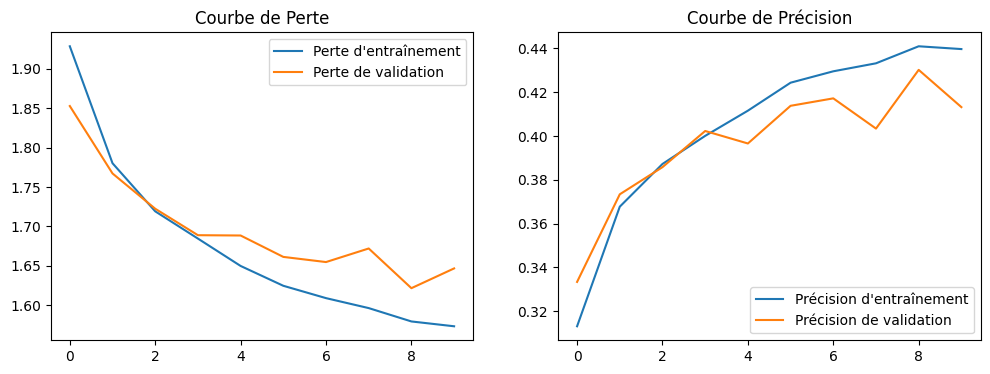

Précision sur les données de test : 42.83%


In [25]:
# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(historique.history['loss'], label='Perte d\'entraînement')
plt.plot(historique.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(historique.history['accuracy'], label='Précision d\'entraînement')
plt.plot(historique.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

In [26]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

# Définir les classes
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_mlp.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


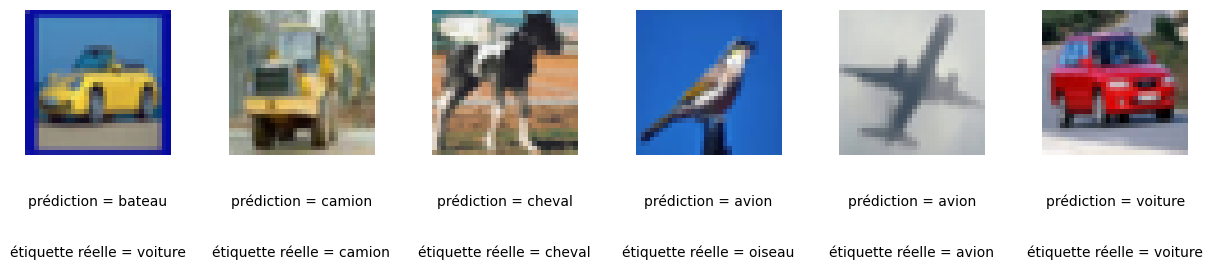

In [27]:
# Nombre d'images à afficher
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions et étiquettes réelles
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)
    
# Afficher la figure
plt.show()

## <a name="C5"><font color='orange'>Réseau de neurone convolutif.</font></a>

**Entrainer le modèle**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10

In [31]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))

C:\Users\jouvi\anaconda3\envs\env_p7\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [33]:
# Entraîner le modèle CNN sur les données d'entraînement
epochs = 10
batch_size = 64

history_cnn = model_cnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

# Enregistrement des résultats.
results_summary.append({
    "modèle": "CNN",
    "accuracy": test_accuracy,
    "loss": test_loss
})

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.2797 - loss: 1.9375 - val_accuracy: 0.4899 - val_loss: 1.4197
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.4680 - loss: 1.4721 - val_accuracy: 0.5620 - val_loss: 1.2554
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5237 - loss: 1.3432 - val_accuracy: 0.5951 - val_loss: 1.1557
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5637 - loss: 1.2260 - val_accuracy: 0.6014 - val_loss: 1.1409
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5826 - loss: 1.1777 - val_accuracy: 0.6330 - val_loss: 1.0570
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6021 - loss: 1.1207 - val_accuracy: 0.6519 - val_loss: 1.0010
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6165 - loss: 1.0840 - val_accuracy: 0.6531 - val_loss: 1.0056
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6324 - loss: 1.0363 - val_a

313/313 - 1s - 4ms/step - accuracy: 0.6701 - loss: 0.9379
Précision sur les données de test : 67.01%


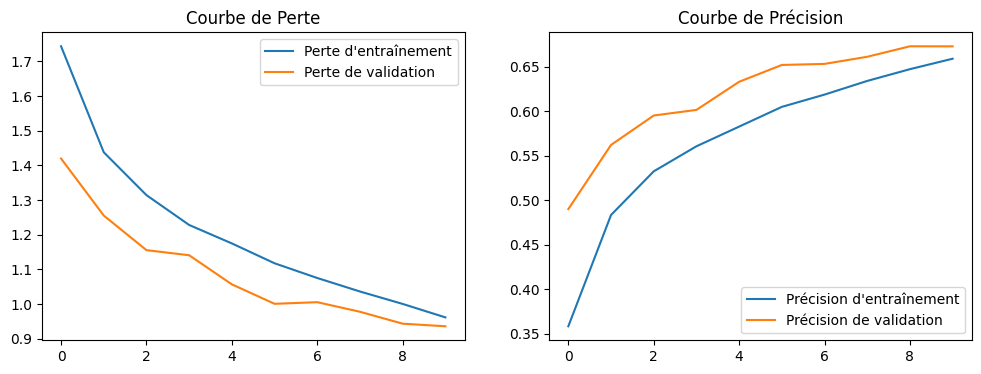

In [34]:
# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Perte d\'entraînement')
plt.plot(history_cnn.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_cnn.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

In [35]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

# Définir les classes
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_cnn.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


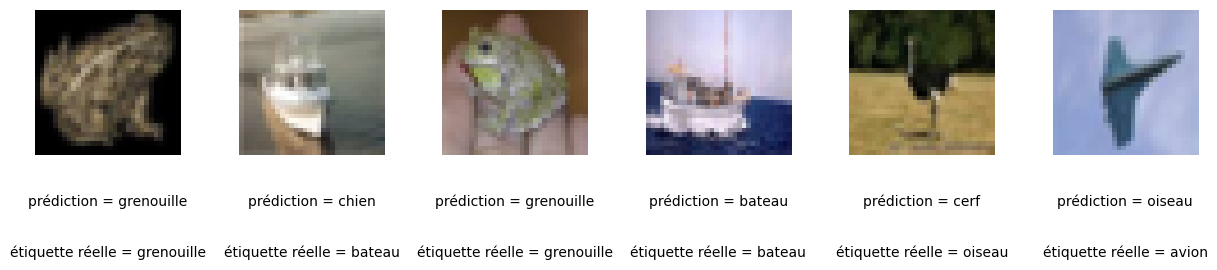

In [36]:
# Nombre d'images à afficher
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions et étiquettes réelles
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)
    
# Afficher la figure
plt.show()

## <a name="C6"><font color='orange'>Autre struture de CNN.</font></a>

In [38]:
# Importer les bibliothèques nécessaires
from tensorflow import keras
from tensorflow.keras import layers, models

# Définir le nombre de classes
NUM_CLASSES = 10

# Créer la structure du modèle CNN avec Batch Normalization en utilisant Sequential()
model_cnn = models.Sequential()

# Couche de convolution 1 : 32 filtres, fenêtre 3x3, activation LeakyReLU, entrée 32x32x3
model_cnn.add(layers.Conv2D(32, (3, 3), strides=1, padding="same", input_shape=(32, 32, 3)))  # Ajouter une parenthèse ici
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de convolution 2 : 32 filtres, fenêtre 3x3, activation LeakyReLU
model_cnn.add(layers.Conv2D(32, (3, 3), strides=2, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de convolution 3 : 64 filtres, fenêtre 3x3, activation LeakyReLU
model_cnn.add(layers.Conv2D(64, (3, 3), strides=1, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de convolution 4 : 64 filtres, fenêtre 3x3, activation LeakyReLU
model_cnn.add(layers.Conv2D(64, (3, 3), strides=2, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Aplatir les données pour les couches entièrement connectées
model_cnn.add(layers.Flatten())

# Couche dense 1 : 128 neurones, activation LeakyReLU
model_cnn.add(layers.Dense(128))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de dropout pour la régularisation
model_cnn.add(layers.Dropout(rate=0.5))

# Couche de sortie : 10 neurones pour les classes, activation softmax
model_cnn.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Afficher un résumé du modèle
model_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

In [39]:
# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [40]:
# Entraîner le modèle CNN sur les données d'entraînement
epochs = 10
batch_size = 64

history_cnn = model_cnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

# Enregistrement des résultats.
results_summary.append({
    "modèle": "CNN + BatchNorm",
    "accuracy": test_accuracy,
    "loss": test_loss
})

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.3864 - loss: 1.8023 - val_accuracy: 0.5523 - val_loss: 1.2744
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.5914 - loss: 1.1564 - val_accuracy: 0.5555 - val_loss: 1.3847
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.6511 - loss: 0.9861 - val_accuracy: 0.5707 - val_loss: 1.2499
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.6861 - loss: 0.8898 - val_accuracy: 0.6865 - val_loss: 0.9060
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7106 - loss: 0.8276 - val_accuracy: 0.6790 - val_loss: 0.9283
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7219 - loss: 0.7836 - val_accuracy: 0.6401 - val_loss: 1.0622
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7465 - loss: 0.7166 - val_accuracy: 0.6833 - val_loss: 0.9349
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.7593 - loss: 0.6890 - 

313/313 - 2s - 8ms/step - accuracy: 0.7074 - loss: 0.8833
Précision sur les données de test : 70.74%


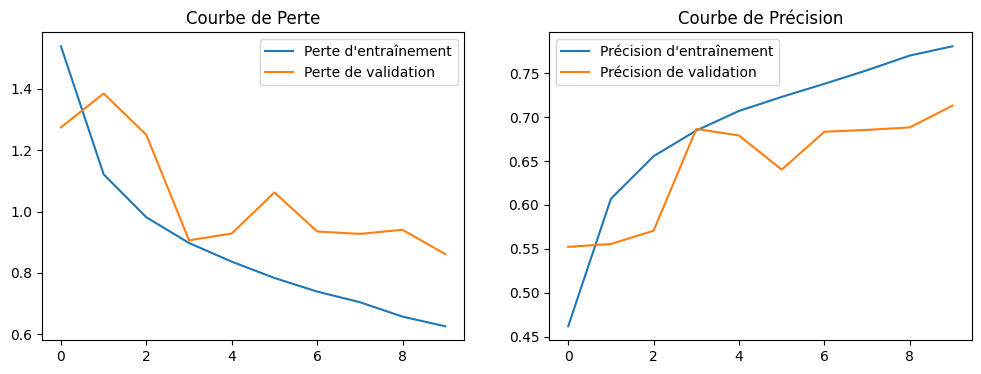

In [41]:
# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Perte d\'entraînement')
plt.plot(history_cnn.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_cnn.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

In [42]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

# Définir les classes
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_cnn.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


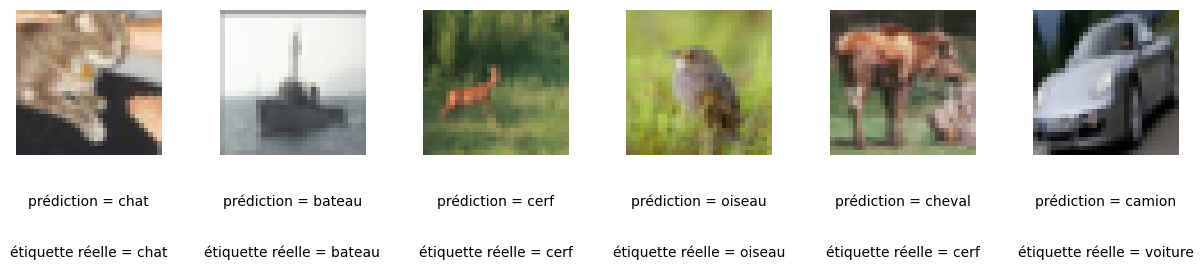

In [43]:
# Nombre d'images à afficher
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions et étiquettes réelles
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)
    
# Afficher la figure
plt.show()

## <a name="C7"><font color='orange'>Modèle en utilisant le transfert learning VGG16.</font></a>

Le **transfert d'apprentissage** est une technique en apprentissage automatique qui consiste à utiliser des modèles déjà entraînés sur des tâches similaires pour résoudre de nouveaux problèmes. Cette approche permet d'économiser du temps et des ressources en capitalisant sur les connaissances préalablement acquises par les modèles pré-entraînés.

Vous pouvez trouver une liste complète de **modèles pré-entraînés** en Keras [ici](https://keras.io/api/applications/). Certains exemples de modèles pré-entraînés incluent :

- [VGG16](https://keras.io/api/applications/vgg/#vgg16-function): Un modèle de vision par ordinateur pré-entraîné sur ImageNet.
- [ResNet50](https://keras.io/api/applications/resnet/#resnet50-function): Un modèle de réseau de neurones résiduels (ResNet) pour la vision par ordinateur.
- [BERT](https://keras.io/api/applications/bert/#bert-function): Un modèle de traitement du langage naturel (NLP) pour la compréhension de texte.

Vous pouvez utiliser ces modèles comme point de départ pour vos propres projets d'apprentissage automatique et les adapter à vos besoins spécifiques.

Vous pouvez trouver une liste complète des **modèles pré-entraînés de Keras** dans la section "Applications" de la documentation Keras. Cette liste comprend des informations détaillées sur chaque modèle pré-entraîné, ainsi que des liens vers leur documentation respective.

[**Liste des modèles pré-entraînés de Keras**](https://keras.io/api/applications/)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10

In [47]:
# Charger le modèle pré-entraîné VGG16 (sans les couches de classification)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [48]:
# Ajouter des couches personnalisées pour la classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [49]:
# Créer le modèle complet
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Geler les couches du modèle VGG16 pour empêcher leur entraînement
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_transfer.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [50]:
# Entraîner le modèle de transfert learning sur les données d'entraînement
epochs = 10
batch_size = 64

history_transfer = model_transfer.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_transfer.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

# Enregistrement des résultats.
results_summary.append({
    "modèle": "VGG16 (Transfert)",
    "accuracy": test_accuracy,
    "loss": test_loss
})

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 176ms/step - accuracy: 0.4078 - loss: 1.6704 - val_accuracy: 0.5547 - val_loss: 1.2818
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 175ms/step - accuracy: 0.5465 - loss: 1.3011 - val_accuracy: 0.5794 - val_loss: 1.2019
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 179ms/step - accuracy: 0.5752 - loss: 1.2155 - val_accuracy: 0.5846 - val_loss: 1.1772
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 178ms/step - accuracy: 0.5841 - loss: 1.1820 - val_accuracy: 0.5976 - val_loss: 1.1599
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 176ms/step - accuracy: 0.5968 - loss: 1.1522 - val_accuracy: 0.6002 - val_loss: 1.1459
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 179ms/step - accuracy: 0.6066 - loss: 1.1245 - val_accuracy: 0.6089 - val_loss: 1.1265
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 194ms/step - accuracy: 0.6139 - loss: 1.1055 - val_accuracy: 0.6136 - val_loss: 1.1101
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 198ms/step - accuracy: 0.6145 -

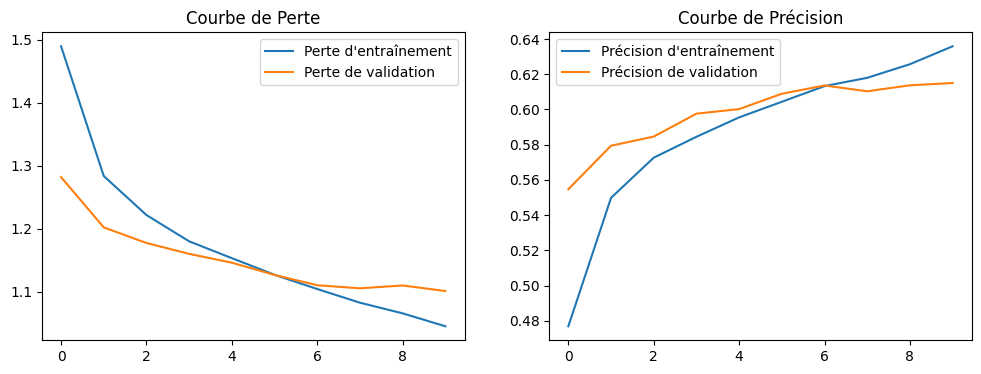

In [51]:
# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['loss'], label='Perte d\'entraînement')
plt.plot(history_transfer.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_transfer.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

# <font color='navy'>PARTIE 2 - Preuve de concept.</font>

## <a name="C9"><font color='orange'>YOLOv11-cls.</font></a>

In [54]:
# modèle 2 YOLOv11-cls.

# Install the ultralytics package from PyPI
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [83]:
import os
from PIL import Image
import shutil
import numpy as np
from ultralytics import YOLO

**Choix du modèle yolo11-cls.**<br>
[Source ultralitics](https://docs.ultralytics.com/fr/tasks/classify/)

Il existe differents modèles pour YOLO11-cls. Plusieurs critères vont nous aider à déterminer le modèle le plus adapté à notre cas d'usage.
- acc top1 : Précision du modèle → un résultat plus élevé indique un meilleure capacité à classifier correctement les images.
- params (M) : Taille du modèle en millions de paramètres → un nombre de paramètre élevé sera plus long à entraîner.
- FLOPs (B) : Coût de calcul.
- vitesse : Temps d’inférence → à prendre en compte notamment si on doit faire du déploiement temps réel.

**YOLO11n-cls** - Permet d'avoir un modèle ultra-léger et rapide mais moins précis.<br>
**YOLO11s-cls** - Bon équilibre précision/taille.<br>
**YOLO11m-cls** - Nécessite un GPU/ précision correcte.<br>
**YOLO11l-cls** - Plutôt orienté projets de recherche ou entraînement custom.<br>
**YOLO11x-cls** - Précision maximale mais lourd à entraîner/déployer.<br>

On utilisera YOLO11n-cls car :
- On travaille sur une preuve de concept, on souhaite avoir un premier aperçu de l'efficacité de YOLO pour la classification de nos données (pas besoin d'un modèle ultra lourd dans un premier temps).
- Les images sont très petites → inutile de surcharger le modèle.

In [94]:
import os
import shutil
import numpy as np
from PIL import Image
from sklearn.model_selection import KFold
from ultralytics import YOLO

# Configuration.
CLASSES = ["avion", "voiture", "oiseau", "chat", "cerf", "chien", "grenouille", "cheval", "bateau", "camion"]
NUM_FOLDS = 5
EPOCHS = 10
IMG_SIZE = 32
BATCH_SIZE = 64
DATASET_DIR = "yolo_dataset"
TRAIN_DIR = os.path.join(DATASET_DIR, "train")
VAL_DIR = os.path.join(DATASET_DIR, "val")
TEST_DIR = os.path.join(DATASET_DIR, "test")
split_ratios = [0.7, 0.15, 0.15]  # train / val / test

# Fonction pour sauvegarder des images.
def save_images(indices, folder):
    for idx in indices:
        img = Image.fromarray((x_train[idx] * 255).astype(np.uint8))
        class_name = CLASSES[np.argmax(y_train[idx])]
        path = os.path.join(folder, class_name, f"{idx}.jpg")
        img.save(path)

# Création du répertoire test.
if os.path.exists(DATASET_DIR):
    shutil.rmtree(DATASET_DIR)
for class_name in CLASSES:
    os.makedirs(os.path.join(TEST_DIR, class_name), exist_ok=True)

# Split pour test une seule fois.
indices = np.arange(len(x_train))
np.random.shuffle(indices)
train_val_end = int(len(indices) * (split_ratios[0] + split_ratios[1]))
train_val_indices = indices[:train_val_end]
test_indices = indices[train_val_end:]
save_images(test_indices, TEST_DIR)

# K-Fold Cross-validation.
kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=42)
accuracies = []
models_paths = []

for fold, (train_idx, val_idx) in enumerate(kf.split(train_val_indices)):
    print(f"\nFold {fold+1}/NUM_FOLDS")

    # Nettoyage des dossiers.
    if os.path.exists(TRAIN_DIR): shutil.rmtree(TRAIN_DIR)
    if os.path.exists(VAL_DIR): shutil.rmtree(VAL_DIR)
    for class_name in CLASSES:
        os.makedirs(os.path.join(TRAIN_DIR, class_name), exist_ok=True)
        os.makedirs(os.path.join(VAL_DIR, class_name), exist_ok=True)

    # Sauvegarde des images.
    train_ids = train_val_indices[train_idx]
    val_ids = train_val_indices[val_idx]
    save_images(train_ids, TRAIN_DIR)
    save_images(val_ids, VAL_DIR)

    # Entraînement YOLO.
    model = YOLO("yolo11n-cls.pt")
    results = model.train(data="yolo_dataset", epochs=EPOCHS, imgsz=IMG_SIZE, batch=BATCH_SIZE, name=f"fold{fold+1}", exist_ok=True)
    
    # Top1 acc
    acc = acc = results.top1
    accuracies.append(acc)

    # Chemin du modèle entraîné.
    best_model_path = os.path.join(results.save_dir, "weights", "best.pt")
    models_paths.append(best_model_path)

# Résultats cross-validation.
mean_acc = sum(accuracies) / len(accuracies)
print("\nRésultats 5-Fold Cross-Validation :")
for i, acc in enumerate(accuracies):
    print(f"Fold {i+1} : top1_acc = {acc:.4f}")
print(f"Moyenne : top1_acc = {mean_acc:.4f}")

# Test final sur un des meilleurs modèles.
best_fold_index = np.argmax(accuracies)
print(f"Évaluation finale sur le jeu de test avec le modèle du Fold {best_fold_index+1}")
best_model = YOLO(models_paths[best_fold_index])
metrics = best_model.val(data="yolo_dataset", split="test")

print(f"\nTest set : top1_acc = {metrics.top1:.4f}, top5_acc = {metrics.top5:.4f}")

# Enregistrement des résultats.
results_summary.append({
    "modèle": "YOLOv11",
    "accuracy": metrics.top1,
    "loss": metrics.loss  # ou un autre champ si nécessaire
})

# Sauvegarde du meilleur modèle pour réutilisation dans le dashboard.
global_best_model_path = "best_overall.pt"
shutil.copy(models_paths[best_fold_index], global_best_model_path)

# Sauvegarde des métadonnées
with open("best_model_info.txt", "w") as f:
    f.write(f"Best Fold: {best_fold_index+1}\n")
    f.write(f"Top1 Accuracy: {accuracies[best_fold_index]:.4f}\n")
    f.write(f"Path: {global_best_model_path}\n")

print(f"\nLe meilleur modèle a été copié ici : {global_best_model_path}")


Fold 1/NUM_FOLDS
New https://pypi.org/project/ultralytics/8.3.112 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.102  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
engine\trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=yolo_dataset, epochs=1, time=None, patience=100, batch=64, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=fold1, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

train: Scanning C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train... 34000 images, 0 co


train: New cache created: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train.cache


val: Scanning C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val... 8500 images, 0 corrupt


val: New cache created: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 32 train, 32 val
Using 0 dataloader workers
Logging results to C:\Users\jouvi\runs\classify\fold1
Starting training for 1 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:07<00:00,  9.54it/s]


                   all       0.48      0.926

1 epochs completed in 0.029 hours.
Optimizer stripped from C:\Users\jouvi\runs\classify\fold1\weights\last.pt, 3.2MB
Optimizer stripped from C:\Users\jouvi\runs\classify\fold1\weights\best.pt, 3.2MB

Validating C:\Users\jouvi\runs\classify\fold1\weights\best.pt...
Ultralytics 8.3.102  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
YOLO11n-cls summary (fused): 47 layers, 1,538,834 parameters, 0 gradients, 3.2 GFLOPs
train: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train... found 34000 images in 10 classes  
val: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val... found 8500 images in 10 classes  
test: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\test... found 7500 images in 10 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:06<00:00, 10.03it/s]


                   all       0.48      0.927
Speed: 0.0ms preprocess, 0.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to C:\Users\jouvi\runs\classify\fold1

Fold 2/NUM_FOLDS
New https://pypi.org/project/ultralytics/8.3.112 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.102  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
engine\trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=yolo_dataset, epochs=1, time=None, patience=100, batch=64, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=fold2, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=

train: Scanning C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train... 34000 images, 0 co


train: New cache created: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train.cache


val: Scanning C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val... 8500 images, 0 corrupt


val: New cache created: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 32 train, 32 val
Using 0 dataloader workers
Logging results to C:\Users\jouvi\runs\classify\fold2
Starting training for 1 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:07<00:00,  9.27it/s]


                   all      0.497       0.93

1 epochs completed in 0.031 hours.
Optimizer stripped from C:\Users\jouvi\runs\classify\fold2\weights\last.pt, 3.2MB
Optimizer stripped from C:\Users\jouvi\runs\classify\fold2\weights\best.pt, 3.2MB

Validating C:\Users\jouvi\runs\classify\fold2\weights\best.pt...
Ultralytics 8.3.102  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
YOLO11n-cls summary (fused): 47 layers, 1,538,834 parameters, 0 gradients, 3.2 GFLOPs
train: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train... found 34000 images in 10 classes  
val: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val... found 8500 images in 10 classes  
test: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\test... found 7500 images in 10 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:07<00:00,  9.50it/s]


                   all      0.497       0.93
Speed: 0.0ms preprocess, 0.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to C:\Users\jouvi\runs\classify\fold2

Fold 3/NUM_FOLDS
New https://pypi.org/project/ultralytics/8.3.112 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.102  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
engine\trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=yolo_dataset, epochs=1, time=None, patience=100, batch=64, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=fold3, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=

train: Scanning C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train... 34000 images, 0 co


train: New cache created: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train.cache


val: Scanning C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val... 8500 images, 0 corrupt


val: New cache created: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 32 train, 32 val
Using 0 dataloader workers
Logging results to C:\Users\jouvi\runs\classify\fold3
Starting training for 1 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:07<00:00,  9.44it/s]


                   all      0.499      0.927

1 epochs completed in 0.031 hours.
Optimizer stripped from C:\Users\jouvi\runs\classify\fold3\weights\last.pt, 3.2MB
Optimizer stripped from C:\Users\jouvi\runs\classify\fold3\weights\best.pt, 3.2MB

Validating C:\Users\jouvi\runs\classify\fold3\weights\best.pt...
Ultralytics 8.3.102  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
YOLO11n-cls summary (fused): 47 layers, 1,538,834 parameters, 0 gradients, 3.2 GFLOPs
train: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train... found 34000 images in 10 classes  
val: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val... found 8500 images in 10 classes  
test: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\test... found 7500 images in 10 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:06<00:00,  9.88it/s]


                   all      0.498      0.928
Speed: 0.0ms preprocess, 0.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to C:\Users\jouvi\runs\classify\fold3

Fold 4/NUM_FOLDS
New https://pypi.org/project/ultralytics/8.3.112 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.102  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
engine\trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=yolo_dataset, epochs=1, time=None, patience=100, batch=64, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=fold4, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=

train: Scanning C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train... 34000 images, 0 co


train: New cache created: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train.cache


val: Scanning C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val... 8500 images, 0 corrupt


val: New cache created: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 32 train, 32 val
Using 0 dataloader workers
Logging results to C:\Users\jouvi\runs\classify\fold4
Starting training for 1 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:07<00:00,  8.57it/s]


                   all      0.511      0.935

1 epochs completed in 0.031 hours.
Optimizer stripped from C:\Users\jouvi\runs\classify\fold4\weights\last.pt, 3.2MB
Optimizer stripped from C:\Users\jouvi\runs\classify\fold4\weights\best.pt, 3.2MB

Validating C:\Users\jouvi\runs\classify\fold4\weights\best.pt...
Ultralytics 8.3.102  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
YOLO11n-cls summary (fused): 47 layers, 1,538,834 parameters, 0 gradients, 3.2 GFLOPs
train: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train... found 34000 images in 10 classes  
val: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val... found 8500 images in 10 classes  
test: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\test... found 7500 images in 10 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:07<00:00,  8.87it/s]


                   all      0.512      0.934
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to C:\Users\jouvi\runs\classify\fold4

Fold 5/NUM_FOLDS
New https://pypi.org/project/ultralytics/8.3.112 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.102  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
engine\trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=yolo_dataset, epochs=1, time=None, patience=100, batch=64, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=fold5, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=

train: Scanning C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train... 34000 images, 0 co


train: New cache created: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train.cache


val: Scanning C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val... 8500 images, 0 corrupt


val: New cache created: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 32 train, 32 val
Using 0 dataloader workers
Logging results to C:\Users\jouvi\runs\classify\fold5
Starting training for 1 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:07<00:00,  9.15it/s]


                   all       0.51      0.933

1 epochs completed in 0.032 hours.
Optimizer stripped from C:\Users\jouvi\runs\classify\fold5\weights\last.pt, 3.2MB
Optimizer stripped from C:\Users\jouvi\runs\classify\fold5\weights\best.pt, 3.2MB

Validating C:\Users\jouvi\runs\classify\fold5\weights\best.pt...
Ultralytics 8.3.102  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
YOLO11n-cls summary (fused): 47 layers, 1,538,834 parameters, 0 gradients, 3.2 GFLOPs
train: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train... found 34000 images in 10 classes  
val: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val... found 8500 images in 10 classes  
test: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\test... found 7500 images in 10 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 67/67 [00:07<00:00,  9.24it/s]


                   all       0.51      0.932
Speed: 0.0ms preprocess, 0.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to C:\Users\jouvi\runs\classify\fold5

Résultats 5-Fold Cross-Validation :
Fold 1 : top1_acc = 0.4798
Fold 2 : top1_acc = 0.4971
Fold 3 : top1_acc = 0.4985
Fold 4 : top1_acc = 0.5124
Fold 5 : top1_acc = 0.5096
Moyenne : top1_acc = 0.4995
Évaluation finale sur le jeu de test avec le modèle du Fold 4
Ultralytics 8.3.102  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
YOLO11n-cls summary (fused): 47 layers, 1,538,834 parameters, 0 gradients, 3.2 GFLOPs
train: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\train... found 34000 images in 10 classes  
val: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\val... found 8500 images in 10 classes  
test: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\test... found 7500 images in 10 classes  


test: Scanning C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\test... 7500 images, 0 corru


test: New cache created: C:\Users\jouvi\OCR - IML\P7 - Developpez une preuve de concept\yolo_dataset\test.cache


               classes   top1_acc   top5_acc: 100%|██████████| 469/469 [00:10<00:00, 43.65it/s]


                   all      0.516      0.934
Speed: 0.0ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to C:\Users\jouvi\runs\classify\val

Test set : top1_acc = 0.5161, top5_acc = 0.9344

Le meilleur modèle a été copié ici : models\best_overall.pt


## <a name="C10"><font color='orange'>Analyse de la feature importance globale et locale.</font></a>

## <a name="C11"><font color='orange'>Comparaison des differents modèles.</font></a>

In [ ]:
# Génération du tableau de synthèse.
df = pd.DataFrame(results_summary)
df["accuracy (%)"] = (df["accuracy"] * 100).round(2)
df["loss"] = df["loss"].round(4)
df = df[["modèle", "accuracy (%)", "loss"]]

# Affichage du tableau
print("\nRésumé des performances sur le jeu de test :")
display(df)